# Unidad Temática 2 

## Práctico Domiciliario 4

<br/>

# Ejercicio 2

En base al blog de la Universidad de Staford “A Titanic Probability”, disponible en http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html, se pide descargar el dataset de los pasajeros del Titanic y realizar un programa que permita responder preguntas existentes. 
Asimismo, se brinda la información de que el dataset contiene atributos de personas como Survived (S), la edad (A), la passenger-class (C), el género (G) y la tarifa del ticket (X).

Inicialmente se importan las librerías que se utilizaran para el desarrollo del ejercicio.

In [148]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

Una vez importadas las librerías, se procede a leer el archivo csv y se lo almacena en la variable df, de nombre `titanic`.

In [149]:
titanic = pd.read_csv('./titanicUS.csv')

In [150]:
titanic.head() # Mostramos las 5 primeras filas del dataset

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


utilizando el método `head()` se visualizan las primeras 5 filas del dataset. Lo que nos permite ver el contenido de las columnas y la información que contiene cada una de ellas.

In [151]:
print(titanic.keys())   # Mostramos las columnas del dataset

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')


In [152]:
types_titanic = titanic.dtypes # Mostramos los tipos de datos de cada columna
num_values = types_titanic[(types_titanic == float)] # Mostramos las columnas que contienen valores numéricos

print("Estos son las columnas que contienen valores numéricos: ")
print(num_values)

Estos son las columnas que contienen valores numéricos: 
Age     float64
Fare    float64
dtype: object


In [153]:
titanic.describe() # Mostramos un resumen estadístico de las columnas numéricas

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


La función `describe()` nos permite ver un resumen de los datos del dataset, como la cantidad de filas, el promedio, la desviación estándar, el valor mínimo y máximo de cada columna.

Lo siguiente es ver la cantidad de valores nulos que tiene el dataset, para ello se utiliza la función `isnull()` y `sum()`.

In [154]:
def null_table(titanic):
    print("Valores nulos en el dataset: ")
    print(pd.isnull(titanic).sum()) # Mostramos los valores nulos de cada columna

null_table(titanic) # Mostramos los valores nulos de cada columna

Valores nulos en el dataset: 
Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


El dataset no contiene valores nulos, por lo que no es necesario realizar un tratamiento de datos. Lo que facilita en cierta manera al momento de realizar las consultas.


In [155]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


En la primer parte de las preguntas se pide lo siguiente:

a. Calcular la probabilidad condicional de que una persona sobreviva dado su género y su clase de pasajero: P(S|G,C).

P(S= true | G=female,C=1)

P(S= true | G=female,C=2)

P(S= true | G=female,C=3)

P(S= true | G=male,C=1)

P(S= true | G=male,C=2)

P(S= true | G=male,C=3)

Text(0.5, 1.0, 'Tasa de sobrevivientes según el Género y la Clase')

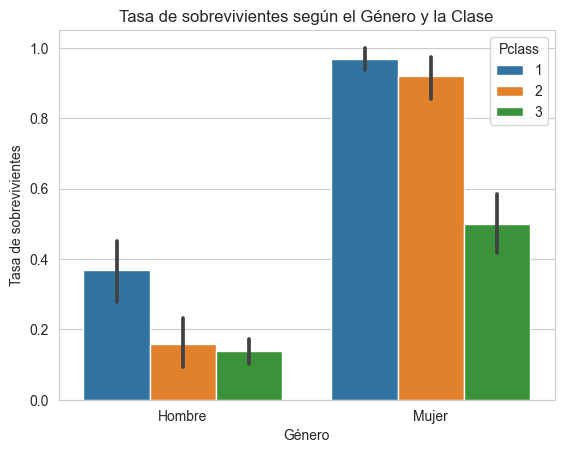

In [156]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=titanic)
plt.ylabel("Tasa de sobrevivientes")
plt.xlabel("Género")
plt.xticks([0,1],["Hombre", "Mujer"])
plt.title("Tasa de sobrevivientes según el Género y la Clase")

In [157]:
# Calcular la probabilidad condicional de sobrevivir dado el género y la clase

df_survived = titanic[titanic['Survived'] == 1] # Filtramos los sobrevivientes
df_survived.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [158]:
def calculate_conditional_probability(data, gender, passenger_class):
    total_count = len(data)
    survived_count = len(data[(data['Survived'] == 1) & (data['Sex'] == gender) & (data['Pclass'] == passenger_class)])
    conditional_probability = survived_count / total_count
    return conditional_probability

# Probabilidades condicionales para mujeres en diferentes clases de pasajeros
female_survived_class_1 = calculate_conditional_probability(titanic, 'female', 1)
female_survived_class_2 = calculate_conditional_probability(titanic, 'female', 2)
female_survived_class_3 = calculate_conditional_probability(titanic, 'female', 3)

# Probabilidades condicionales para hombres en diferentes clases de pasajeros
male_survived_class_1 = calculate_conditional_probability(titanic, 'male', 1)
male_survived_class_2 = calculate_conditional_probability(titanic, 'male', 2)
male_survived_class_3 = calculate_conditional_probability(titanic, 'male', 3)

# Imprimir los resultados
print("P(Survived=true | Gender=female, Class=1):", round(female_survived_class_1, 3))
print("P(Survived=true | Gender=female, Class=2):", round(female_survived_class_2, 3))
print("P(Survived=true | Gender=female, Class=3):", round(female_survived_class_3, 3))
print("P(Survived=true | Gender=male, Class=1):", round(male_survived_class_1, 3))
print("P(Survived=true | Gender=male, Class=2):", round(male_survived_class_2, 3))
print("P(Survived=true | Gender=male, Class=3):", round(male_survived_class_3, 3))

P(Survived=true | Gender=female, Class=1): 0.103
P(Survived=true | Gender=female, Class=2): 0.079
P(Survived=true | Gender=female, Class=3): 0.081
P(Survived=true | Gender=male, Class=1): 0.051
P(Survived=true | Gender=male, Class=2): 0.019
P(Survived=true | Gender=male, Class=3): 0.053


El resultado mostrado anteriormente es la probabilidad condicional de que una persona sobreviva dado su género y su clase de pasajero.


In [159]:
#se importa la libreria sklearn, para poder realizar el mismo ejercicio pero con la libreria.

from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba (no se utilizará el conjunto de prueba en este caso)
train_titanic, _ = train_test_split(titanic, test_size=0.3, random_state=42)


La función `train_test_split()` nos permite dividir el dataset en dos partes, una para entrenamiento y otra para testeo. En este caso se utiliza el 70% para entrenamiento y el 30% para testeo.

El `random_state` establece la semilla para el generador de números aleatorios. Proporcionar un valor específico (en este caso, 42) garantizará que la división del conjunto de datos sea reproducible. 

In [160]:
# Calcular las probabilidades condicionales utilizando scikit-learn
def calc_cond_prob_sklearn(data, gender, pclass):
    survived_count = data[(data['Survived'] == 1) & (data['Sex'] == gender) & (data['Pclass'] == pclass)].shape[0]
    total_count = data.shape[0]
    conditional_probability = survived_count / total_count
    return conditional_probability

In [161]:
# fsc -> female_survived_class y msc -> male_survived_class
# Probabilidades condicionales para mujeres en diferentes clases de pasajeros.
fsc_1 = calc_cond_prob_sklearn(train_titanic, 'female', 1)
fsc_2 = calc_cond_prob_sklearn(train_titanic, 'female', 2)
fsc_3 = calc_cond_prob_sklearn(train_titanic, 'female', 3)

# Probabilidades condicionales para hombres en diferentes clases de pasajeros.
msc_1 = calc_cond_prob_sklearn(train_titanic, 'male', 1)
msc_2 = calc_cond_prob_sklearn(train_titanic, 'male', 2)
msc_3 = calc_cond_prob_sklearn(train_titanic, 'male', 3)

In [162]:
print("P(S=true | G=female, C=1):", round(fsc_1, 3))
print("P(S=true | G=female, C=2):", round(fsc_2, 3))
print("P(S=true | G=female, C=3):", round(fsc_3, 3))
print("P(S=true | G=male, C=1):", round(msc_1, 3))
print("P(S=true | G=male, C=2):", round(msc_2, 3))
print("P(S=true | G=male, C=3):", round(msc_3, 3))

P(S=true | G=female, C=1): 0.115
P(S=true | G=female, C=2): 0.087
P(S=true | G=female, C=3): 0.081
P(S=true | G=male, C=1): 0.039
P(S=true | G=male, C=2): 0.016
P(S=true | G=male, C=3): 0.052


Los valores en ambos casos son similares, aunque se muestra una pequeña diferencia entre los 2 resultados. Esto se debe a que en el primer caso se utilizó el conjunto de datos completo, mientras que en el segundo caso se utilizó el conjunto de entrenamiento. Por lo tanto, el segundo resultado es más preciso.

### b. ¿Cuál es la probabilidad de que un niño que tenga 10 o menos años de edad y esté en 3era clase sobreviva? 

P(S= true | A≤10,C=3)

Para calcular la probabilidad de que un niño que tenga 10 o menos años de edad y esté en 3era clase sobreviva, se utiliza la función `query()` y se le pasa como parámetro la condición que se quiere evaluar. 

In [163]:
# Calcular la probabilidad de sobrevivir de un niño de 10 años y de 3ra clase
def calc_cond_prob_child(data, age, pclass):
    total_count = len(data)
    survived_count = len(data[(data['Survived'] == 1) & (data['Age'] <= age) & (data['Pclass'] == pclass)])
    conditional_probability = survived_count / total_count
    return conditional_probability

In [164]:
def calc_cond_prob_child_sklearn(data, age, pclass):
    survived_count = data[(data['Survived'] == 1) & (data['Age'] <= age) & (data['Pclass'] == pclass)].shape[0]
    total_count = data.shape[0]
    conditional_probability = survived_count / total_count
    return conditional_probability


In [165]:
child_survived_class_3 = calc_cond_prob_child(titanic, 10, 3)
print("P(S=true | A=10, C=3):", round(child_survived_class_3, 5))

child_survived_class_3 = calc_cond_prob_child_sklearn(train_titanic, 10, 3)
print("P(S=true | A=10, C=3):", round(child_survived_class_3, 5))

P(S=true | A=10, C=3): 0.0248
P(S=true | A=10, C=3): 0.02581


### c. ¿Cuánto pagaron las personas por estar en el barco? Calcular la expectativa de la tarifa (X) condicionada por la clase de pasajero (C).

E[X|C=1]

E[X|C=2]

E[X|C=3]

In [166]:
def calc_cond_fare_class(data, pclass):
    filtered_data = data[data['Pclass'] == pclass] # Filtramos los datos por clase
    total_count = len(filtered_data)
    total_fare = filtered_data['Fare'].sum() # Sumamos los valores de la columna Fare
    expected_fare = total_fare / total_count
    return expected_fare

In [167]:
expected_fare_class_1 = calc_cond_fare_class(titanic, 1)
expected_fare_class_2 = calc_cond_fare_class(titanic, 2)
expected_fare_class_3 = calc_cond_fare_class(titanic, 3)

print("Tarifa promedio para la clase 1:", round(expected_fare_class_1, 3))
print("Tarifa promedio para la clase 2:", round(expected_fare_class_2, 3))
print("Tarifa promedio para la clase 3:", round(expected_fare_class_3, 3))

Tarifa promedio para la clase 1: 84.155
Tarifa promedio para la clase 2: 20.662
Tarifa promedio para la clase 3: 13.708
